In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

In [2]:
# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'C:/Users/wise1012/Desktop/Kaggle/Dataset/ComputerVision/Car_or_Truck/train',
    labels='inferred',
    label_mode='binary',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

ds_valid_ = image_dataset_from_directory(
    'C:/Users/wise1012/Desktop/Kaggle/Dataset/ComputerVision/Car_or_Truck/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [3]:
ds_train_.take(1)

<TakeDataset shapes: ((None, 224, 224, 3), (None, 1)), types: (tf.uint8, tf.float32)>

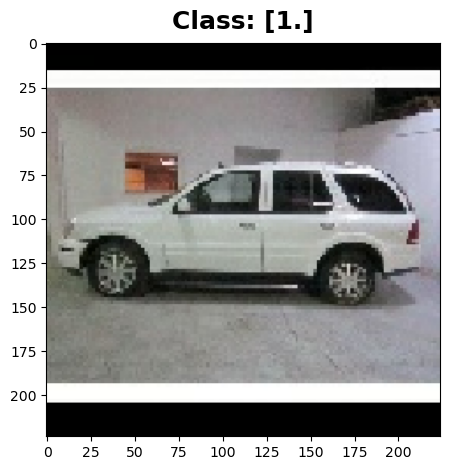

In [4]:
for images, labels in ds_train_.take(1):
    # Display the first image in the batch
    plt.imshow(images[1].numpy().astype("uint8"))
    plt.title(f'Class: {labels[1].numpy()}')
    plt.show()

In [5]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [6]:
ds_train

<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 1)), types: (tf.float32, tf.float32)>

In [7]:
from tensorflow.keras.applications import VGG16

In [8]:
base_model = VGG16(weights='imagenet', include_top=True)

In [9]:
base_model.trainable = False

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=5,
    verbose=1,
)

Epoch 1/5
80/80 [==============================] - ETA: 0s - loss: 0.6867 - binary_accuracy: 0.5732 

KeyboardInterrupt: 

In [ ]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, history['loss', 'val_loss']].plot()
#history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();